# Frequency Modulated Continuous Radar (FMCW)
## Radar and Navigation
### Coding Task

---

*Developed by:*<br>
Naufal Mu'afi - 20/456724/TK/50548<br>
Department of Electrical and Information Engineering - UGM<br>
naufalmuafi@mail.ugm.ac.id

---

First, we import the module that we use later

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Next, we define all the constant/variable of FMCW Parameters

In [26]:
# Constant
c = 3e8

# FMCW Signal Parameters
fc = 25e6    # Carrier Frequency (Hz)
bw = 1e5     # Bandwidth (Hz)
fr = 2       # Chirp Frequency (Hz)
tr = 1/fr    # Chirp period (Hz)

# Time Range
ns = 2**10                  # number of sample
tg = np.linspace(0, 1, ns)  # generation of time vector

In [27]:
"""

FMCW Signal Generation

"""

# initial condition
st = np.zeros(ns, dtype=complex)  # transmitted signal
ft = np.zeros(ns)                 # frequency of transmitted signal

for i in range(len(tg)):
    tg_i = tg[i]
    
    while tg_i > tr:
        tg_i -= tr
    
    tg_i -= tr/2
    st[i] = np.cos(2*np.pi*fc*tg_i + np.pi*bw*fr*(tg_i**2))
    ft[i] = fc + bw*fr*tg_i

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


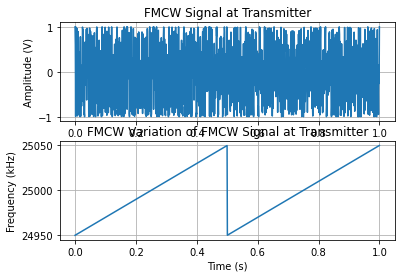

In [28]:
"""

FMCW Signal Plot

"""

# Graph 1
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(tg, st)
plt.title('FMCW Signal at Transmitter')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)

# Graph 2
plt.subplot(2, 1, 2)
plt.plot(tg, ft/1000)
plt.title('FMCW Variation of FMCW Signal at Transmitter')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (kHz)')
plt.grid(True)

Target = Ships

In [29]:
# Target Parameters
Rt = 95e3  # Target Distance (m)
Vt = 10    # Target radial velocity (m/s)

In [30]:
"""

Received Signal Generation

"""

# initial condition
srx = np.zeros(ns, dtype=complex)  # received signal
frx = np.zeros(ns)                 # frequency of received signal

for i in range(len(tg)):
    tg_i = tg[i]
    t_delay = 2*Rt/c
    t_delay += (2*tg_i*Vt/c)
    tg_i -= t_delay
    
    while tg_i > tr:
        tg_i -= tr
    
    tg_i -= tr/2
    srx[i] = np.cos(2 * np.pi * fc * tg_i + np.pi * bw * fr * (tg_i**2))
    frx[i] = fc + bw*fr*tg_i

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


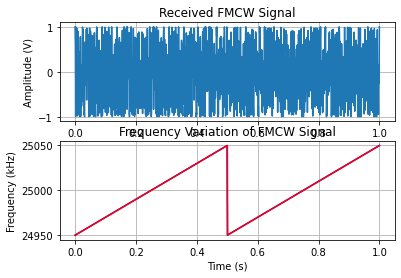

In [31]:
"""

Received FMCW Signal Plot

"""

# Graph 1
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(tg, st)
plt.title('Received FMCW Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)

# Graph 2
plt.subplot(2, 1, 2)
plt.plot(tg, ft/1000, 'b')
plt.plot(tg, frx/1000, 'r')
plt.title('Frequency Variation of FMCW Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (kHz)')
plt.grid(True)

In [ ]:
"""

add Gaussian Noise

"""

